In [202]:
import pandas as pd
import numpy as np
import seaborn as sns

In [201]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv' ,header=0)
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [203]:
df.columns


Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [195]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [196]:
df.isna().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [204]:
df=df.drop(columns=['sex','rank','discipline'],axis=0)


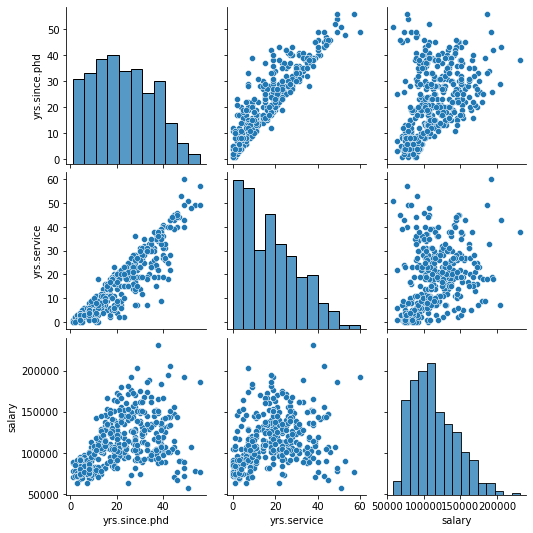

In [206]:
sns.pairplot(df)

In [207]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   yrs.since.phd  397 non-null    int64
 1   yrs.service    397 non-null    int64
 2   salary         397 non-null    int64
dtypes: int64(3)
memory usage: 9.4 KB


In [208]:
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


In [209]:
X = df.drop('salary', axis=1)
y = df['salary']
X

,yrs.since.phd,yrs.service
0,19,18
1,20,16
2,4,3
3,45,39
4,40,41
...,...,...
392,33,30
393,31,19
394,42,25
395,25,15


In [210]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train)

     yrs.since.phd  yrs.service
64               4            3
55              14            5
316             12            9
102             16            5
261             45           45
..             ...          ...
323             24           15
192             19           18
117             39           36
47              23           19
172             37           24

[317 rows x 2 columns]


In [211]:
y_train.head()

64      68404
55      83900
316     71065
102    153303
261    107550
Name: salary, dtype: int64

In [212]:

from sklearn.linear_model import LinearRegression
#creating model object
lm = LinearRegression()
#fitting the model object in the model
lm.fit(X_train, y_train)

LinearRegression()

In [213]:

y_pred = lm.predict(X_test)

In [214]:
print(y_pred)

[ 99670.70934181 101236.84867512 119714.77681592  94806.41060939
  99128.45197088 102426.61136998 107335.52527593  99670.70934181
  91674.13194276 117064.12274075 116687.74610229 106853.90068446
 140345.7168345  101342.09662812 107772.53469385 109128.17812117
 108209.54411178 112470.9526938  110423.18876902 104369.12734176
 118690.89485353  98586.19459995 100694.5913042  115437.35062797
 116250.73668436  99399.58065634 103992.75070329 126145.21488165
 106372.276093   129382.74150128 121446.7968817  106101.14740754
  97020.05526664 103992.75070329 101884.35399905  95348.66798032
 118419.76616807 129172.24559529 122681.17475009 103179.3646469
 122847.05548256 111718.19941688 130090.87960468 113450.21948266
 125542.32473126 114097.72480658 127229.72962351 126460.95874065
 124744.9562808  113389.58670319  99399.58065634 107772.53469385
 131054.1287876  106040.51462807 104369.12734176 130677.75214914
 120196.40140738 120738.65877831 131612.40376446 126853.35298504
 136023.67547301  96643.67

In [215]:
#using r2_score method
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("The accuracy of the model is ", score*100, "%")


The accuracy of the model is  21.201594267950785 %


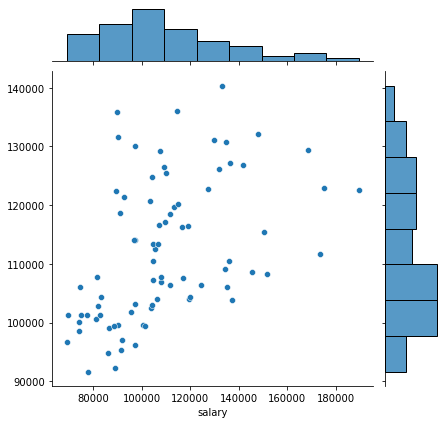

In [216]:
sns.jointplot(x=y_test, y=y_pred)

In [217]:
 from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [218]:
y_pred=lm.predict(X_test)

In [219]:
mean_absolute_error(y_test,y_pred)

17368.54212925559

In [147]:
mean_squared_error(y_test,y_pred)

513080044.9170494

In [220]:
np.sqrt(mean_squared_error(y_test,y_pred))

22651.270271599547

In [221]:
from sklearn.ensemble import AdaBoostRegressor

In [222]:
ada=AdaBoostRegressor()

In [223]:
ada.fit(X_train,y_train)

AdaBoostRegressor()

In [224]:
y_pred=ada.predict(X_train)

In [227]:
accuracy = r2_score(y_train,y_pred)

In [229]:
print(r2_score,accuracy*100)

<function r2_score at 0x000001760DF188B0> 40.21403826419848
